In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Loading and Preprocessing:**
  - **Loading the Image:** We read the image using `cv2.imread()` and convert it to RGB.
  - **Resizing:** Resizing helps in reducing computational load. Adjust `scale_percent` as needed.

In [62]:
image = cv2.imread('image.png')
# Convert from BGR (OpenCV default) to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [63]:
# Optionally resize the image to make processing faster
scale_percent = 100  # Adjust scale percentage as needed
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
resized_image = cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)

**Preparing Data for K-means:**
  - The image is reshaped into a 2D array where each row is a pixel and each column is a color channel.
  - Convert pixel values to `float32` as required by OpenCV's K-means function.

In [64]:
# Reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = resized_image.reshape((-1, 3))
# Convert to float type
pixel_values = np.float32(pixel_values)

**Applying K-means Clustering:**
  - **Criteria:** Defines when the algorithm should stop.
  - **K (Number of Clusters):** adjust `K` to segment the image into different numbers of clusters.
  - **Labels and Centers:** The output of K-means where `labels` indicate the cluster for each pixel, and `centers` are the color values of the centroids.

In [65]:
# Define criteria, number of clusters (K), and apply KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K = 5  # You can change K to get different segmentation results
_, labels, centers = cv2.kmeans(pixel_values, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

**Reconstructing the Segmented Image:**
  - **Segmented Image:** Each pixel is replaced with the centroid color of its cluster.


In [66]:
# Convert centers to 8 bit values
centers = np.uint8(centers)
# Flatten the labels array
labels_flatten = labels.flatten()
# Convert all pixels to the color of the centroids
segmented_image = centers[labels_flatten]
segmented_image = segmented_image.reshape(resized_image.shape)

**Extracting a Specific Cluster:**
  - To focus on a particular feature (e.g., buildings or vegetation), select a cluster number and create a masked image where only the pixels belonging to that cluster are shown.

In [67]:
# Optionally, create an image showing the clusters
masked_image = np.copy(resized_image)
# Convert the background pixels to black
masked_image = masked_image.reshape((-1, 3))
cluster = 2  # The cluster you want to extract (change as needed)
masked_image[labels_flatten != cluster] = [0, 0, 0]
masked_image = masked_image.reshape(resized_image.shape)

**Displaying the Results:**
  - We use `matplotlib` to display the original image, the segmented image, and the extracted cluster.

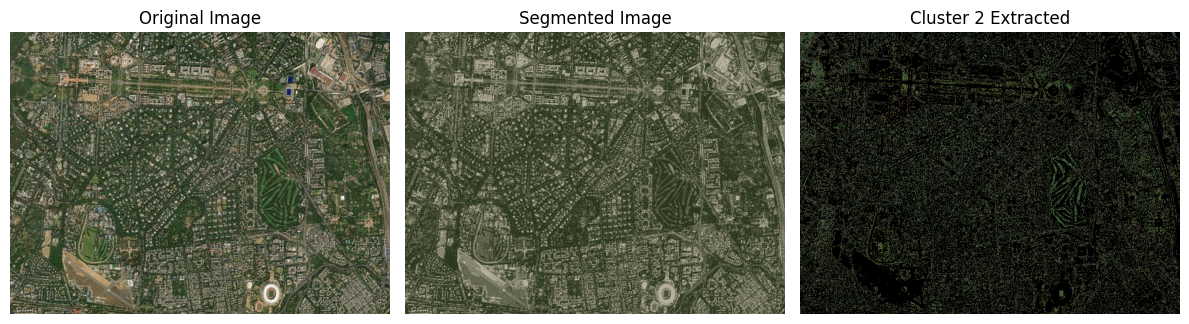

In [68]:
# Display the images
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(resized_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(masked_image)
plt.title(f'Cluster {cluster} Extracted')
plt.axis('off')

plt.tight_layout()
plt.show()

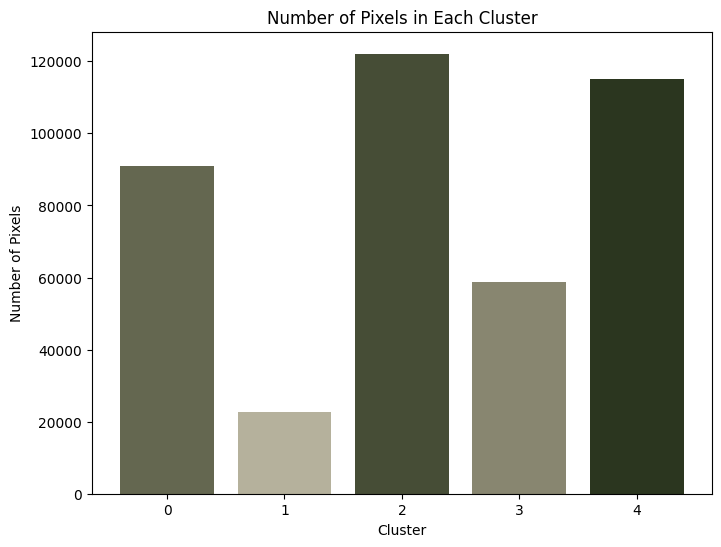

In [69]:
# Calculate the number of pixels in each cluster
_, counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(8, 6))
plt.bar(range(K), counts, color=[centers[i]/255 for i in range(K)])
plt.xlabel('Cluster')
plt.ylabel('Number of Pixels')
plt.title('Number of Pixels in Each Cluster')
plt.show()